In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
sns.set(font_scale=1.5)

**************************************************

Presenteeism param sweep -- large-goods wp

**************************************************

In [2]:
df = pd.read_csv("presenteeism_param_sweep_pairs.csv")
df['NRecovered'] = df['FracRecovered']*df['NStaff']

In [3]:
print('II = ', np.unique(df["InfInit"]))
print('TD = ', np.unique(df["tD"]))
print('FP = ', np.unique(df["fixed_driver_pairs"]))
print('WO = ', np.unique(df["is_window_open"]))
print('PI = ', np.unique(dfpairs["pair_isolation"]))

print('Phi = ', np.unique(dfpairs['phi']))
print('Pisol = ', np.unique(dfpairs['Pisol']))
print('Random contact rate = ', np.unique(dfpairs['p_contact']))
print('Friend contact prob = ', np.unique(dfpairs['p_friend_contact']))
print('Staff totals = ', np.unique(dfpairs['NStaff']))

NameError: name 'dfpairs' is not defined

In [4]:
f_outbreak = np.zeros((len(PIsol),len(PFC),len(II)))
f_outbreak5 = np.zeros((len(PIsol),len(PFC),len(II)))
for (i,pi) in enumerate(PIsol):
    for (j,pf) in enumerate(PFC):
        for (k,ii) in enumerate(II):
            dfh = df1.loc[lambda df1: (df1['Pisol'] == pi) & \
                                      (df1['p_friend_contact'] == pf) & \
                                      (df1['InfInit'] == ii) & \
                                      (df1['Group'] == 'All')]
            f_outbreak[i,j,k] = np.sum(dfh['FracRecovered'] > 1/dfh['NStaff'])/len(dfh)
            f_outbreak5[i,j,k] = np.sum(dfh['FracRecovered'] > 5/dfh['NStaff'])/len(dfh)

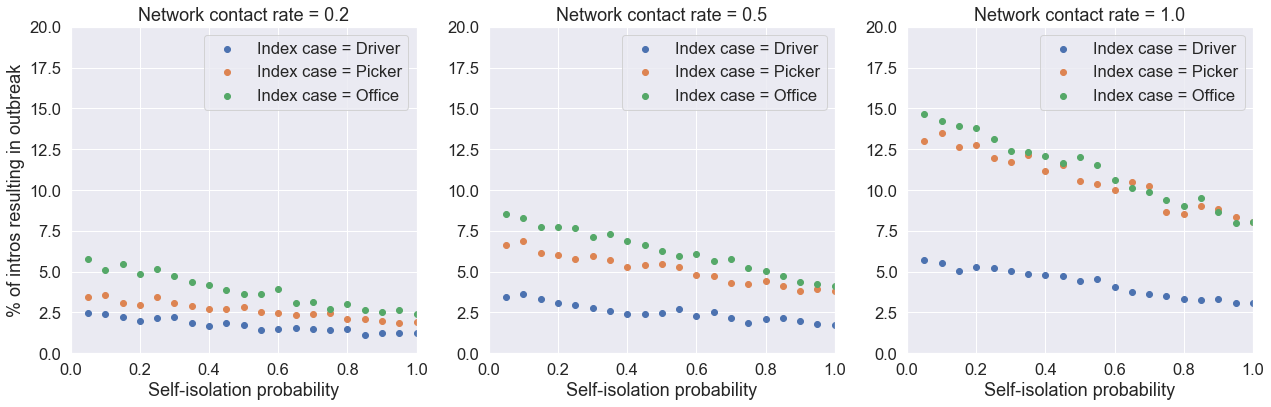

In [8]:
fig,ax = plt.subplots(1,3,figsize=(18,6))
job = ['Driver','Picker','Office']
for (j,pf) in enumerate(PFC):
    for (k,ii) in enumerate(II):
        ax[j].scatter(PIsol,100*f_outbreak5[:,j,k],label='Index case = %s'%job[k])
    ax[j].legend()
    ax[j].set_xlabel('Self-isolation probability')
    ax[j].set_title('Network contact rate = %.1f'%pf)
    ax[j].set_xlim((0,1))
    ax[j].set_ylim((0,20))
ax[0].set_ylabel('% of intros resulting in outbreak')
fig.tight_layout()
fig.savefig('presenteeism.png')

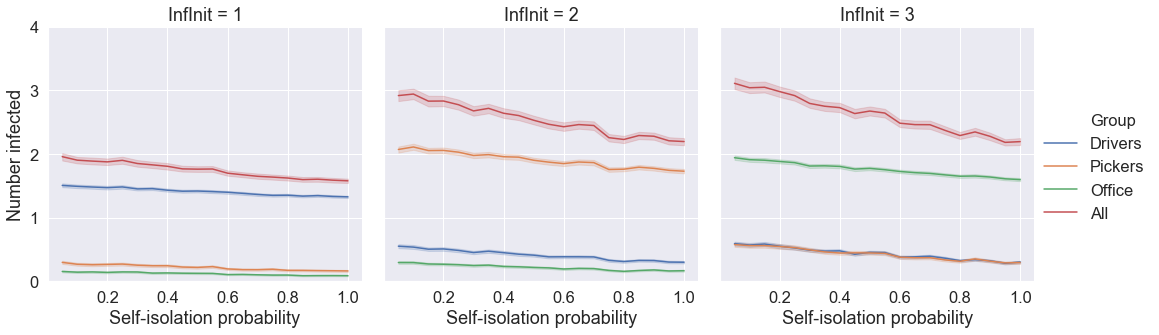

In [9]:
figh = sns.relplot(x="Pisol", y="NRecovered", col="InfInit",hue="Group",\
                   data=df1.loc[lambda df1: (df1['p_friend_contact'] == 1.0)], kind="line")
figh.set(xlabel='Self-isolation probability',ylabel='Number infected', ylim=(0,4))
figh.savefig("network_workplace_presenteeism_outbreak_size.png")